In [1]:
import pandas as pd
import os
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = "VCHAMPS"

In [3]:
# dataset
# useful column: Internalpatientid, Age at admission, Admission date, 
#                First listed discharge diagnosis icd10 subcategory, Second listed discharge diagnosis icd10 subcategory,
#                Died during admission, Outpatientreferralflag
dataset_path = 'inpatient_admissions_train.csv'
load_path = os.path.join(DATA_PATH, dataset_path)
in_ad = pd.read_csv(load_path)
in_ad

,Unnamed: 0,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State
0,0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,No,No,NaN,Yes,Utah
1,1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,No,Yes,No,No,North Carolina
2,2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,No,No,NaN,No,North Carolina
3,3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,No,Yes,NaN,Yes,Florida
4,5,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,No,No,NaN,NaN,Idaho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522735,665831,99965,93.433950,2022-07-21 02:36:19.0,2022-08-01 14:55:43.0,MEDICINE,MEDICINE,SUBST ABUSE CWT/TRANS RESID,GENERAL(ACUTE MEDICINE),Chronic or unspecified duodenal ulcer with hem...,Diastolic (congestive) heart failure,Regular,No,No,NaN,No,California
522736,665832,99975,86.145532,2015-08-08 04:36:10.0,2015-08-17 03:26:06.0,MEDICINE,MEDICINE,Not specified,GENERAL(ACUTE MEDICINE),"Cutaneous abscess, furuncle and carbuncle of l...","Finding of other specified substances, not nor...",Regular,No,Yes,NaN,No,Minnesota
522737,665833,99975,88.555516,2018-01-05 00:59:05.0,2018-01-06 23:18:39.0,NON-COUNT,NON-COUNT,PODIATRY,MEDICAL OBSERVATION,"Umbilical hernia with obstruction, without gan...",Essential (primary) hypertension,Regular,No,No,NaN,No,Minnesota
522738,665834,99986,73.435908,2019-06-26 19:47:10.0,2019-06-29 21:18:00.0,MEDICINE,MEDICINE,INTERMEDIATE MEDICINE,GENERAL(ACUTE MEDICINE),Cellulitis and acute lymphangitis of other par...,Other chronic osteomyelitis,Regular,No,Yes,NaN,No,Nevada


In [4]:
# dataset
# Useful columns: Internalpatientid, Age at ed visit, Ed visit start date, Died during ed visit, First listed diagnosis icd10 subcategory, Second listed diagnosis icd10 subcategory	
dataset_path = 'ed_visits_train.csv'
load_path = os.path.join(DATA_PATH, dataset_path)
ed = pd.read_csv(load_path)
ed = ed[["Internalpatientid", "Age at ed visit", "Died during ed visit", 
         "First listed diagnosis icd10 subcategory", "Second listed diagnosis icd10 subcategory"]]
ed

,Internalpatientid,Age at ed visit,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory
0,101689,64.361251,No,Systolic (congestive) heart failure,"Chronic kidney disease, unspecified"
1,107210,71.317300,No,"Sepsis, unspecified organism","Hypotension, unspecified"
2,107866,61.164579,No,Other nonspecific abnormal finding of lung field,"Hypotension, unspecified"
3,107906,66.101996,No,Dysuria,"Chronic kidney disease, unspecified"
4,108522,73.598130,No,Type 2 diabetes mellitus with circulatory comp...,Type 2 diabetes mellitus with unspecified comp...
...,...,...,...,...,...
549852,99934,83.538682,No,"Pain in limb, hand, foot, fingers and toes",Not specified
549853,99936,71.860371,No,Pain in joint,Not specified
549854,99987,67.470347,No,Not specified,Not specified
549855,9999,62.070707,No,Not specified,Not specified


In [5]:
# dataset
dataset_path = 'outpatient_visits_train.csv'
load_path = os.path.join(DATA_PATH, dataset_path)
out_visits = pd.read_csv(load_path)
out_visits = out_visits[["Internalpatientid", "Age at visit", "First listed diagnosis icd10 subcategory", "Second listed diagnosis icd10 subcategory"]]
out_visits

,Internalpatientid,Age at visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory
0,1,60.619995,Not specified,Not specified
1,1,61.032110,Not specified,Not specified
2,1,61.907075,Not specified,Not specified
3,1,62.296573,Not specified,Not specified
4,1,63.632066,Not specified,Not specified
...,...,...,...,...
82692715,99999,96.300251,Not specified,Not specified
82692716,99999,96.322523,Not specified,Not specified
82692717,99999,96.327503,Not specified,Not specified
82692718,99999,96.360092,Not specified,Not specified


In [9]:
cardiovascular = ["Heart failure, unspecified", "Other heart failure",
                  "Cardiogenic shock", "Hypertensive heart disease with heart failure",
                  "Hypertensive heart and kidney disease with heart failure", "Unstable angina", "Other forms of chronic ischemic heart disease",
                  "Atherosclerotic heart disease of native coronary artery", "Atrial fibrillation", "Atrial flutter",
                  "Supraventricular tachycardia", "Ventricular tachycardia"]
# "Systolic (congestive) heart failure", "Diastolic (congestive) heart failure", "Combined systolic (congestive) and diastolic (congestive) heart failure",
# "ST elevation (STEMI) myocardial infarction", "Non-ST elevation (NSTEMI) myocardial infarction"

In [10]:
# Find all patients that have diagnosed as cardiovascular
cardio_in = in_ad[in_ad["Second listed discharge diagnosis icd10 subcategory"].str.contains('|'.join(cardiovascular))
      | in_ad["Second listed discharge diagnosis icd10 subcategory"].str.contains("Systolic (congestive) heart failure", regex=False)
      | in_ad["Second listed discharge diagnosis icd10 subcategory"].str.contains("Diastolic (congestive) heart failure", regex=False)
      | in_ad["Second listed discharge diagnosis icd10 subcategory"].str.contains("Combined systolic (congestive) and diastolic (congestive) heart failure", regex=False)
      | in_ad["Second listed discharge diagnosis icd10 subcategory"].str.contains("ST elevation (STEMI) myocardial infarction", regex=False)
      | in_ad["Second listed discharge diagnosis icd10 subcategory"].str.contains("Non-ST elevation (NSTEMI) myocardial infarction", regex=False)
      | in_ad["First listed discharge diagnosis icd10 subcategory"].str.contains('|'.join(cardiovascular))
      | in_ad["First listed discharge diagnosis icd10 subcategory"].str.contains("Systolic (congestive) heart failure", regex=False)
      | in_ad["First listed discharge diagnosis icd10 subcategory"].str.contains("Diastolic (congestive) heart failure", regex=False)
      | in_ad["First listed discharge diagnosis icd10 subcategory"].str.contains("Combined systolic (congestive) and diastolic (congestive) heart failure", regex=False)
      | in_ad["First listed discharge diagnosis icd10 subcategory"].str.contains("ST elevation (STEMI) myocardial infarction", regex=False)
      | in_ad["First listed discharge diagnosis icd10 subcategory"].str.contains("Non-ST elevation (NSTEMI) myocardial infarction", regex=False)]["Internalpatientid"].unique()


In [9]:
cardio_out = out_visits[out_visits["Second listed diagnosis icd10 subcategory"].str.contains('|'.join(cardiovascular))
      | out_visits["Second listed diagnosis icd10 subcategory"].str.contains("Systolic (congestive) heart failure", regex=False)
      | out_visits["Second listed diagnosis icd10 subcategory"].str.contains("Diastolic (congestive) heart failure", regex=False)
      | out_visits["Second listed diagnosis icd10 subcategory"].str.contains("Combined systolic (congestive) and diastolic (congestive) heart failure", regex=False)
      | out_visits["Second listed diagnosis icd10 subcategory"].str.contains("ST elevation (STEMI) myocardial infarction", regex=False)
      | out_visits["Second listed diagnosis icd10 subcategory"].str.contains("Non-ST elevation (NSTEMI) myocardial infarction", regex=False)
      | out_visits["First listed diagnosis icd10 subcategory"].str.contains('|'.join(cardiovascular))
      | out_visits["First listed diagnosis icd10 subcategory"].str.contains("Systolic (congestive) heart failure", regex=False)
      | out_visits["First listed diagnosis icd10 subcategory"].str.contains("Diastolic (congestive) heart failure", regex=False)
      | out_visits["First listed diagnosis icd10 subcategory"].str.contains("Combined systolic (congestive) and diastolic (congestive) heart failure", regex=False)
      | out_visits["First listed diagnosis icd10 subcategory"].str.contains("ST elevation (STEMI) myocardial infarction", regex=False)
      | out_visits["First listed diagnosis icd10 subcategory"].str.contains("Non-ST elevation (NSTEMI) myocardial infarction", regex=False)]["Internalpatientid"].unique()

In [10]:
cardio_ed = ed[ed["Second listed diagnosis icd10 subcategory"].str.contains('|'.join(cardiovascular))
      | ed["Second listed diagnosis icd10 subcategory"].str.contains("Systolic (congestive) heart failure", regex=False)
      | ed["Second listed diagnosis icd10 subcategory"].str.contains("Diastolic (congestive) heart failure", regex=False)
      | ed["Second listed diagnosis icd10 subcategory"].str.contains("Combined systolic (congestive) and diastolic (congestive) heart failure", regex=False)
      | ed["Second listed diagnosis icd10 subcategory"].str.contains("ST elevation (STEMI) myocardial infarction", regex=False)
      | ed["Second listed diagnosis icd10 subcategory"].str.contains("Non-ST elevation (NSTEMI) myocardial infarction", regex=False)
      | ed["First listed diagnosis icd10 subcategory"].str.contains('|'.join(cardiovascular))
      | ed["First listed diagnosis icd10 subcategory"].str.contains("Systolic (congestive) heart failure", regex=False)
      | ed["First listed diagnosis icd10 subcategory"].str.contains("Diastolic (congestive) heart failure", regex=False)
      | ed["First listed diagnosis icd10 subcategory"].str.contains("Combined systolic (congestive) and diastolic (congestive) heart failure", regex=False)
      | ed["First listed diagnosis icd10 subcategory"].str.contains("ST elevation (STEMI) myocardial infarction", regex=False)
      | ed["First listed diagnosis icd10 subcategory"].str.contains("Non-ST elevation (NSTEMI) myocardial infarction", regex=False)]["Internalpatientid"].unique()

In [15]:
# Find all the patients who has cardiovascular
cardio_all = np.union1d(np.union1d(cardio_in, cardio_out), cardio_ed)
len(cardio_all)

79867

In [21]:
all_patients = np.union1d(np.union1d(in_ad["Internalpatientid"].unique(), ed["Internalpatientid"].unique()), out_visits["Internalpatientid"].unique())
noncardio_all = np.setdiff1d(all_patients, cardio_all)
len(noncardio_all)

53385

In [23]:
# save the patients
np.save("cardio_all.npy", cardio_all)
np.save("noncardio_all.npy", noncardio_all)
np.save("all_patient.npy", all_patients)

-----
Add new columns to the inpatient_admission table

In [6]:
out_patientid = out_visits['Internalpatientid'].unique()

In [7]:
readmission_id = []
for ids, group in tqdm(in_ad.groupby("Internalpatientid")):
    pid = group["Internalpatientid"].unique()[0]
    num_admissions = group["Age at admission"].nunique()
    if num_admissions > 1: readmission_id.append(pid)

  0%|          | 0/84536 [00:00<?, ?it/s]

In [11]:
cardio = []
readmission = []
outpatient = []
for row in in_ad['Internalpatientid']:
    if row in readmission_id: readmission.append(1)
    else: readmission.append(0)
     
    if row in cardio_in: cardio.append(1)
    else: cardio.append(0)

    if row in out_patientid: outpatient.append(1)
    else: outpatient.append(0)

    

In [12]:
in_ad["Cardiovascular"] = cardio
in_ad["Readmission"] = readmission
in_ad["Outpatientreferralflag"] = outpatient
in_ad

,Unnamed: 0,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Cardiovascular,Readmission
0,0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,No,1,NaN,Yes,Utah,0,0
1,1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,No,1,No,No,North Carolina,0,1
2,2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,No,1,NaN,No,North Carolina,0,1
3,3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,No,1,NaN,Yes,Florida,0,0
4,5,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,No,1,NaN,NaN,Idaho,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522735,665831,99965,93.433950,2022-07-21 02:36:19.0,2022-08-01 14:55:43.0,MEDICINE,MEDICINE,SUBST ABUSE CWT/TRANS RESID,GENERAL(ACUTE MEDICINE),Chronic or unspecified duodenal ulcer with hem...,Diastolic (congestive) heart failure,Regular,No,1,NaN,No,California,1,1
522736,665832,99975,86.145532,2015-08-08 04:36:10.0,2015-08-17 03:26:06.0,MEDICINE,MEDICINE,Not specified,GENERAL(ACUTE MEDICINE),"Cutaneous abscess, furuncle and carbuncle of l...","Finding of other specified substances, not nor...",Regular,No,1,NaN,No,Minnesota,0,1
522737,665833,99975,88.555516,2018-01-05 00:59:05.0,2018-01-06 23:18:39.0,NON-COUNT,NON-COUNT,PODIATRY,MEDICAL OBSERVATION,"Umbilical hernia with obstruction, without gan...",Essential (primary) hypertension,Regular,No,1,NaN,No,Minnesota,0,1
522738,665834,99986,73.435908,2019-06-26 19:47:10.0,2019-06-29 21:18:00.0,MEDICINE,MEDICINE,INTERMEDIATE MEDICINE,GENERAL(ACUTE MEDICINE),Cellulitis and acute lymphangitis of other par...,Other chronic osteomyelitis,Regular,No,1,NaN,No,Nevada,1,1


In [11]:
in_ad.to_csv("inpatient_admission_withtarget.csv")

Finding missing values and duplicates

In [41]:
in_ad = pd.read_csv("inpatient_admission_withtarget.csv")

In [11]:
in_ad[in_ad["Age at admission"].isnull() | in_ad["Admission date"].isnull()]

,Unnamed: 0,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Cardiovascular,Readmission


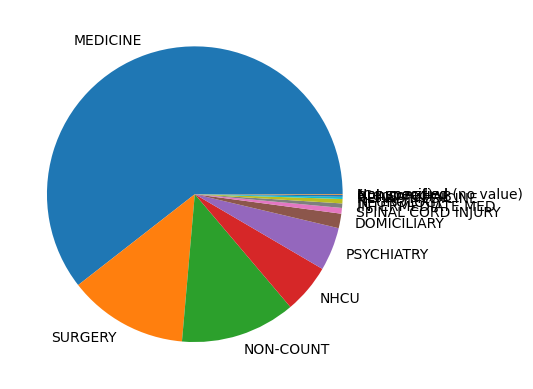

In [38]:
plt.pie(in_ad["Admitting unit service"].value_counts(), labels = in_ad["Admitting unit service"].value_counts().index);

In [42]:
# Combine groups with smaller counts into one category
in_ad["Admitting unit service"] = in_ad["Admitting unit service"].replace({'REHAB MEDICINE':'MEDICINE', 'INTERMEDIATE MED':'MEDICINE',
                                        '(Censored)':'OTHERS', 'Not specified (no value)':'OTHERS', 'Not specified':'OTHERS', 'NON-COUNT':'OTHERS'})

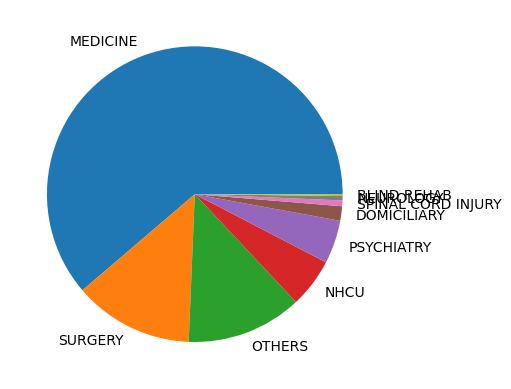

In [43]:
plt.pie(in_ad["Admitting unit service"].value_counts(), labels = in_ad["Admitting unit service"].value_counts().index);

In [31]:
in_ad["Admitting unit service"].unique()

array(['NON-COUNT', 'MEDICINE', 'SURGERY', 'NHCU', 'PSYCHIATRY',
       'REHAB MEDICINE', 'INTERMEDIATE MED', 'NEUROLOGY', 'DOMICILIARY',
       'BLIND REHAB', '(Censored)', 'SPINAL CORD INJURY',
       'Not specified (no value)', 'Not specified'], dtype=object)

In [13]:
in_ad[in_ad["Discharge date"].isnull()]

,Unnamed: 0,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Cardiovascular,Readmission
396,519,102234,74.367408,2022-07-16 06:54:12.0,NaN,NHCU,NHCU,"PULMONARY, TUBERCULOSIS",NH LONG-STAY CONTINUING CARE,Weakness,Type 2 diabetes mellitus without complications,Not specified (no value),No,NaN,No,No,Louisiana,1,1
1982,2594,111568,69.337322,2020-10-25 18:59:28.0,NaN,MEDICINE,MEDICINE,MEDICAL STEP DOWN,GENERAL(ACUTE MEDICINE),Not specified,Not specified,Not specified (no value),No,NaN,NaN,NaN,Florida,0,1
2647,3423,115030,72.930577,2023-10-27 03:01:29.0,NaN,NHCU,NHCU,HIGH INTENSITY GEN PSYCH INPAT,NH LONG-STAY CONTINUING CARE,Not specified,Not specified,Not specified (no value),No,NaN,NaN,NaN,Maryland,1,1
3915,5033,122180,57.346163,2018-10-26 00:32:21.0,NaN,NHCU,NHCU,PSYCH RESID REHAB PROG,NH LONG-STAY CONTINUING CARE,Fracture of head and neck of femur,Pain in joint,Not specified (no value),No,NaN,NaN,No,Florida,0,1
6916,8843,134116,93.564859,2024-08-25 22:56:47.0,NaN,MEDICINE,MEDICINE,INTERMEDIATE MEDICINE,TELEMETRY,Not specified,Not specified,Not specified (no value),No,NaN,NaN,No,Florida,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515480,656612,78051,78.979333,2016-10-20 22:42:41.0,NaN,NHCU,NHCU,"PULMONARY, NON-TB",NH LONG-STAY CONTINUING CARE,(Censored),"Urinary tract infection, site not specified",Not specified (no value),No,NaN,No,No,Texas,0,1
516132,657425,88349,74.120852,2025-04-06 04:06:43.0,NaN,MEDICINE,MEDICINE,GENERAL SURGERY,GENERAL(ACUTE MEDICINE),Not specified,Not specified,Not specified (no value),No,NaN,NaN,NaN,Nevada,1,1
520687,663273,96010,81.459315,2020-10-08 09:06:47.0,NaN,SPINAL CORD INJURY,SPINAL CORD INJURY,PTSD RESID REHAB PROG,GENERAL(ACUTE MEDICINE),Not specified,Not specified,Not specified (no value),No,NaN,NaN,NaN,Ohio,0,1
522117,665052,96702,63.414981,2023-10-01 04:12:48.0,NaN,MEDICINE,MEDICINE,DOMICILIARY PTSD,GENERAL(ACUTE MEDICINE),Not specified,Not specified,Not specified (no value),No,NaN,NaN,NaN,Rhode Island,1,1


In [23]:
in_ad[in_ad["Serviceconnectedflag"].isnull()]

,Unnamed: 0,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Cardiovascular,Readmission
0,0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,No,No,NaN,Yes,Utah,0,0
2,2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,No,No,NaN,No,North Carolina,0,1
3,3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,No,Yes,NaN,Yes,Florida,0,0
4,5,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,No,No,NaN,NaN,Idaho,0,0
5,6,100020,54.555173,2016-03-27 21:58:50.0,2016-03-27 23:41:21.0,NON-COUNT,NON-COUNT,PSYCH RESID REHAB TRMT PROG,ED OBSERVATION,Essential (primary) hypertension,Other specified abnormal findings of blood che...,Regular,No,Yes,NaN,No,Pennsylvania,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522735,665831,99965,93.433950,2022-07-21 02:36:19.0,2022-08-01 14:55:43.0,MEDICINE,MEDICINE,SUBST ABUSE CWT/TRANS RESID,GENERAL(ACUTE MEDICINE),Chronic or unspecified duodenal ulcer with hem...,Diastolic (congestive) heart failure,Regular,No,No,NaN,No,California,1,1
522736,665832,99975,86.145532,2015-08-08 04:36:10.0,2015-08-17 03:26:06.0,MEDICINE,MEDICINE,Not specified,GENERAL(ACUTE MEDICINE),"Cutaneous abscess, furuncle and carbuncle of l...","Finding of other specified substances, not nor...",Regular,No,Yes,NaN,No,Minnesota,0,1
522737,665833,99975,88.555516,2018-01-05 00:59:05.0,2018-01-06 23:18:39.0,NON-COUNT,NON-COUNT,PODIATRY,MEDICAL OBSERVATION,"Umbilical hernia with obstruction, without gan...",Essential (primary) hypertension,Regular,No,No,NaN,No,Minnesota,0,1
522738,665834,99986,73.435908,2019-06-26 19:47:10.0,2019-06-29 21:18:00.0,MEDICINE,MEDICINE,INTERMEDIATE MEDICINE,GENERAL(ACUTE MEDICINE),Cellulitis and acute lymphangitis of other par...,Other chronic osteomyelitis,Regular,No,Yes,NaN,No,Nevada,1,1
